In [90]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'axes.labelsize': 16,'xtick.labelsize': 14, 'ytick.labelsize': 14,'legend.fontsize': 12})

In [91]:
def plot_scatter(x, title='Scatter Plot', x_label='X-axis', y_label='Y-axis'):
    # 绘制散点图
    plt.scatter(np.arange(len(x)),x,marker='o', s=2)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    # # 设置X轴和Y轴范围
    # plt.xlim(0,5)  # 设置X轴范围
    plt.ylim(0, 5)  # 设置Y轴范围
    plt.show()

def plot_line(x, title='Scatter Plot', x_label='X-axis', y_label='Y-axis'):
    # 绘制散点图
    plt.plot(np.arange(len(x)),x, label='数据线', color='blue')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    # 设置X轴和Y轴范围
    # plt.xlim(0,5)  # 设置X轴范围
    plt.ylim(0, 5)  # 设置Y轴范围
    plt.show()

def plot_step(data, title='Scatter Plot', x_label='X-axis', y_label='Y-axis',yrange=(-0.5,5.5)):

    # 创建阶梯状波形
    plt.step(range(len(data)), data,where='post')

    # 设置X轴标签
    plt.xlabel(x_label)

    # 设置Y轴标签
    plt.ylabel(y_label)

    # 设置标题
    plt.title(title)
    yd,yu=yrange
    plt.ylim(yd, yu)

    # 显示阶梯状波形
    plt.show()

def plot_step2(data1,data2, title='Scatter Plot', x_label='X-axis', y_label='Y-axis',label1='Beginning',label2='End',yrange=(-0.5,5.5),save=''):
    ymin,ymax=yrange
    # 创建两个子图
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

    # 在第一个子图中绘制第一条曲线
    ax1.step(range(len(data1)), data1,where='post',label=label1,color='orange')
    ax1.set_ylabel('Voltage/V')
    ax1.set_ylim(ymin, ymax)  # 设置y轴范围为0到5
    # ax1.set_yticks(np.linspace(ymin, ymax, 5))  # 设置Y轴刻度值
    ax1.legend()

    # 在第二个子图中绘制第二条曲线
    ax2.step(range(len(data2)), data2,where='post',label=label2,color='blue')
    ax2.set_xlabel('Time/$t_d$')
    ax2.set_ylabel('Voltage/V')
    ax2.set_ylim(ymin, ymax)  # 设置y轴范围为0到5
    # ax2.set_yticks(np.linspace(ymin, ymax, 5))  # 设置Y轴刻度值
    ax2.legend()

    # 设置标题
    plt.suptitle('Theoretical Waveforms at the Beginning and End of a Coaxial Cable')

    # 调整子图之间的垂直间距
    plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, hspace=0.08)
    # 显示图形
    if save!='':
        plt.savefig(save,bbox_inches='tight')
    plt.show()


In [92]:
Z0=50.4
Zs=50.
Z1=1e6
u_sourse=5.

def reflectoin_coe(Z0,Zs,Z1):
    refl_s=(Zs-Z0)/(Zs+Z0)
    refl_1=(Z1-Z0)/(Z1+Z0)
    return refl_s,refl_1

reflectoin_coe(Z0,Zs,Z1)

(-0.003984063745019906, 0.9998992050800639)

In [93]:
def mydraw(Z0,Zs,Z1,u_sour=5,Nmax=10,yrange=(-0.5,5.5),save=''):
    us=np.zeros(Nmax)
    u1=np.zeros(Nmax)
    ur=us[0]=u_sour*Z0/(Zs+Z0)
    uin=0
    refl_s,refl_1=reflectoin_coe(Z0,Zs,Z1)
    print(f'始端反射系数{refl_s},终端反射系数{refl_1}')
    for i in range(1,Nmax):
        # print(i,end='')
        uin=ur
        if i%2:
            # print('奇数吗')
            ur=refl_1*uin
            us[i]=us[i-1]
            u1[i]=u1[i-1]+ur+uin
        else:
            # print('偶数吗')
            ur=refl_s*uin
            us[i]=us[i-1]+ur+uin
            u1[i]=u1[i-1]

        
    # plot_step(us,title='Beginning')
    # plot_step(u1,title='Endings')
    print()
    print(f'始端电压变化{us}')
    print(f'终端电压变化{u1}')
    plot_step2(us,u1,yrange=yrange,save=save)

等效信号源电压是10.0，等效信号源内阻是50.0
始端反射系数-0.003984063745019906,终端反射系数-0.003984063745019906

始端电压变化[5.01992032 5.01992032 5.00000032 5.00000032 5.         5.
 5.         5.         5.         5.        ]
终端电压变化[0.         4.99992064 4.99992064 5.         5.         5.
 5.         5.         5.         5.        ]


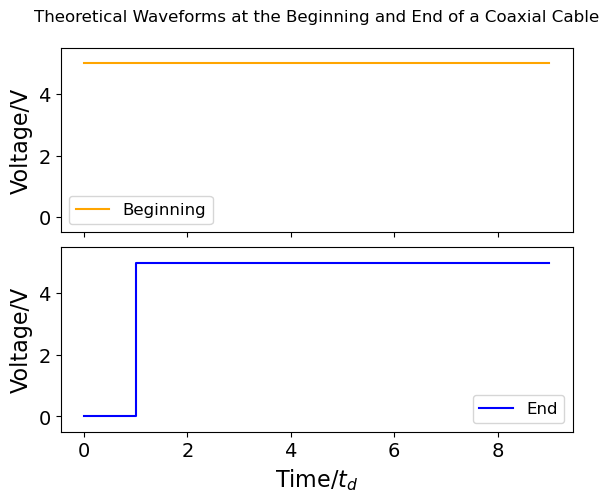

In [94]:
#序号1
Z0=50.4
Zs=50
v_sourse=10.

#串联等效
Zspc=0.
#并联等效
Zspb=1e100
v_sourser=Zspb*v_sourse/(Zspb+Zs+Zspc)
Zsr=(Zs+Zspc)*Zspb/(Zs+Zspc+Zspb)
print(f'等效信号源电压是{v_sourser}，等效信号源内阻是{Zsr}')

# 输出端等效
Z1=50.

mydraw(Z0,Zsr,Z1,u_sour=v_sourser,yrange=(-0.5,5.5),save='实验2/pic/xh1the.png')

等效信号源电压是10.0，等效信号源内阻是50.0
始端反射系数-0.003984063745019906,终端反射系数0.9998992050800639

始端电压变化[ 5.01992032  5.01992032 10.01933699 10.01933699  9.999421    9.999421
  9.99950034  9.99950034  9.99950002  9.99950002]
终端电压变化[ 0.         10.03933465 10.03933465  9.99934134  9.99934134  9.99950066
  9.99950066  9.99950002  9.99950002  9.99950003]


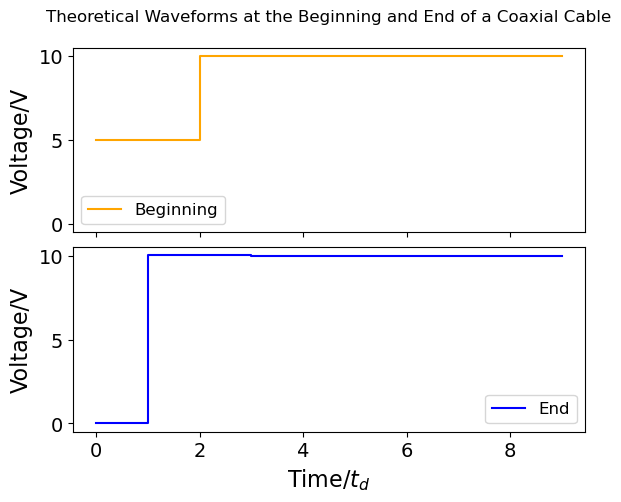

In [95]:
#序号2
Z0=50.4
Zs=50
v_sourse=10.

#串联等效
Zspc=0.
#并联等效
Zspb=1e100
v_sourser=Zspb*v_sourse/(Zspb+Zs+Zspc)
Zsr=(Zs+Zspc)*Zspb/(Zs+Zspc+Zspb)
print(f'等效信号源电压是{v_sourser}，等效信号源内阻是{Zsr}')

# 输出端等效
Z1=1e6

mydraw(Z0,Zsr,Z1,u_sour=v_sourser,yrange=(-0.5,10.5),save='实验2/pic/xh2the.png')

等效信号源电压是10.0，等效信号源内阻是50.0
始端反射系数-0.003984063745019906,终端反射系数-1.0

始端电压变化[5.01992032e+00 5.01992032e+00 1.99996825e-02 1.99996825e-02
 7.96800101e-05 7.96800101e-05 3.17450240e-07 3.17450240e-07
 1.26474206e-09 1.26474206e-09]
终端电压变化[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


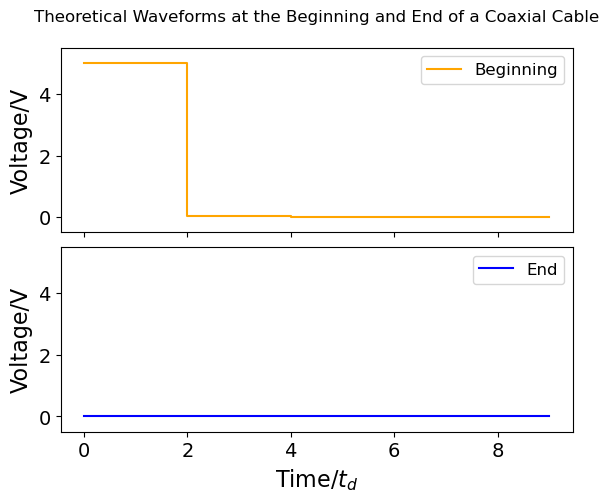

In [96]:
#序号3
Z0=50.4
Zs=50
v_sourse=10.

#串联等效
Zspc=0.
#并联等效
Zspb=1e100
v_sourser=Zspb*v_sourse/(Zspb+Zs+Zspc)
Zsr=(Zs+Zspc)*Zspb/(Zs+Zspc+Zspb)
print(f'等效信号源电压是{v_sourser}，等效信号源内阻是{Zsr}')

# 输出端等效
Z1=0

mydraw(Z0,Zsr,Z1,u_sour=v_sourser,yrange=(-0.5,5.5),save='实验2/pic/xh3the.png')

等效信号源电压是5.0495049504950495，等效信号源内阻是25.247524752475247
始端反射系数-0.3324956808544055,终端反射系数0.9998992050800639

始端电压变化[3.36422177 3.36422177 5.60962798 5.60962798 4.86311537 4.86311537
 5.11130257 5.11130257 5.02878971 5.02878971]
终端电压变化[0.         6.72810444 6.72810444 4.49126426 4.49126426 5.23492899
 5.23492899 4.9876886  4.9876886  5.06988668]


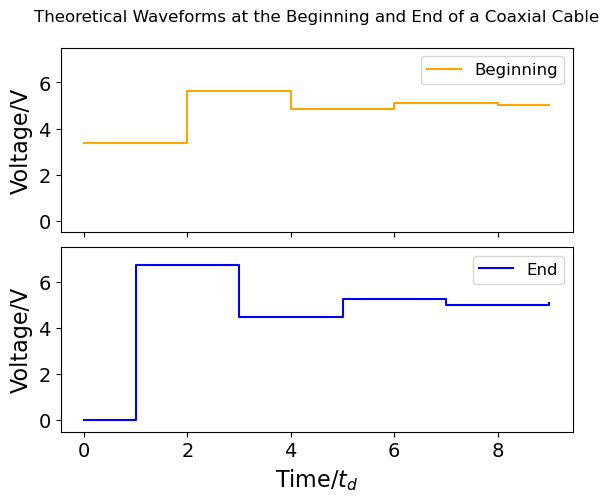

In [97]:
#序号4
Z0=50.4
Zs=50
v_sourse=10.

#串联等效
Zspc=0.
#并联等效
Zspb=51.
v_sourser=Zspb*v_sourse/(Zspb+Zs+Zspc)
Zsr=(Zs+Zspc)*Zspb/(Zs+Zspc+Zspb)
print(f'等效信号源电压是{v_sourser}，等效信号源内阻是{Zsr}')

# 输出端等效
Z1=1e6

mydraw(Z0,Zsr,Z1,u_sour=v_sourser,yrange=(-0.5,7.5),save='实验2/pic/xh4the.png')

等效信号源电压是5.0495049504950495，等效信号源内阻是25.247524752475247
始端反射系数-0.3324956808544055,终端反射系数-1.0

始端电压变化[3.36422177 3.36422177 1.11858921 1.11858921 0.37192608 0.37192608
 0.12366382 0.12366382 0.04111768 0.04111768]
终端电压变化[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


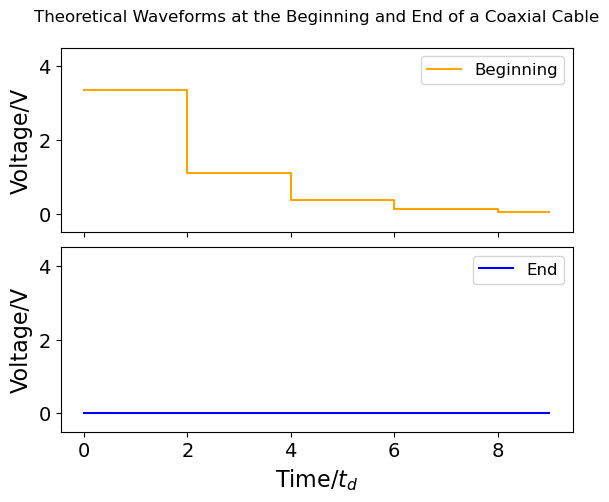

In [98]:
#序号5
Z0=50.4
Zs=50
v_sourse=10.

#串联等效
Zspc=0.
#并联等效
Zspb=51.
v_sourser=Zspb*v_sourse/(Zspb+Zs+Zspc)
Zsr=(Zs+Zspc)*Zspb/(Zs+Zspc+Zspb)
print(f'等效信号源电压是{v_sourser}，等效信号源内阻是{Zsr}')

# 输出端等效
Z1=0

mydraw(Z0,Zsr,Z1,u_sour=v_sourser,yrange=(-0.5,4.5),save='实验2/pic/xh5the.png')

等效信号源电压是10.0，等效信号源内阻是560.0
始端反射系数0.834862385321101,终端反射系数0.9998992050800639

始端电压变化[0.82568807 0.82568807 2.34055935 2.34055935 3.60514093 3.60514093
 4.66078611 4.66078611 5.54201572 5.54201572 6.27764703 6.27764703
 6.89173603 6.89173603 7.40436416 7.40436416 7.83229497 7.83229497
 8.1895223  8.1895223  8.48772789 8.48772789 8.73666344 8.73666344
 8.94446941 8.94446941 9.11794131 9.11794131 9.26275188 9.26275188
 9.38363659 9.38363659 9.48454852 9.48454852 9.5687876  9.5687876
 9.63910855 9.63910855 9.69781095 9.69781095 9.74681443 9.74681443
 9.78772147 9.78772147 9.82186978 9.82186978 9.85037605 9.85037605
 9.87417246 9.87417246]
终端电压变化[0.         1.65129292 1.65129292 3.02975631 3.02975631 4.18046755
 4.18046755 5.14105625 5.14105625 5.94293478 5.94293478 6.61232553
 6.61232553 7.17111836 7.17111836 7.63758645 7.63758645 8.02698386
 8.02698386 8.35204435 8.35204435 8.62339776 8.62339776 8.84991769
 8.84991769 9.0390116  9.0390116  9.19686307 9.19686307 9.32863405
 9.32863405 9.438

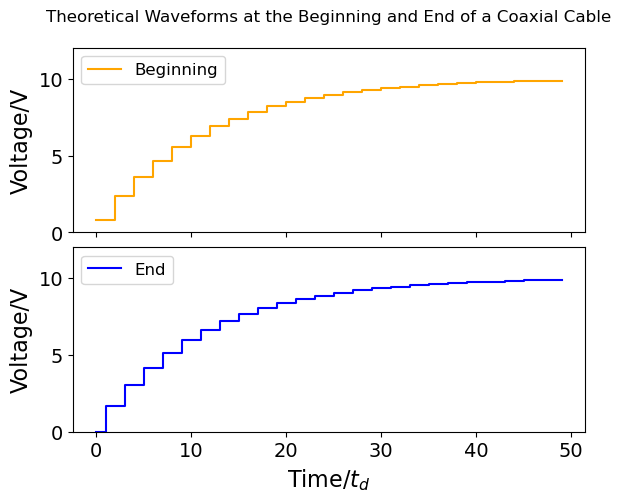

In [120]:
#序号6
Z0=50.4
Zs=50
v_sourse=10.

#串联等效
Zspc=510.
#并联等效
Zspb=1e100
v_sourser=Zspb*v_sourse/(Zspb+Zs+Zspc)
Zsr=(Zs+Zspc)*Zspb/(Zs+Zspc+Zspb)
print(f'等效信号源电压是{v_sourser}，等效信号源内阻是{Zsr}')

# 输出端等效
Z1=1e6

mydraw(Z0,Zsr,Z1,Nmax=50,u_sour=v_sourser,yrange=(0,12),save='实验2/pic/xh6the.png')

等效信号源电压是10.0，等效信号源内阻是560.0
始端反射系数0.834862385321101,终端反射系数-1.0

始端电压变化[ 0.82568807  0.82568807 -0.68933591 -0.68933591  0.57550063  0.57550063
 -0.48046383 -0.48046383  0.40112118  0.40112118 -0.33488098 -0.33488098
  0.27957953  0.27957953 -0.23341044 -0.23341044  0.19486559  0.19486559
 -0.16268595 -0.16268595  0.13582038  0.13582038 -0.11339133 -0.11339133
  0.09466616  0.09466616 -0.07903321 -0.07903321  0.06598186  0.06598186
 -0.05508577 -0.05508577  0.04598904  0.04598904 -0.03839452 -0.03839452
  0.03205414  0.03205414 -0.02676079 -0.02676079  0.02234158  0.02234158
 -0.01865215 -0.01865215  0.01557197  0.01557197 -0.01300046 -0.01300046
  0.01085359  0.01085359]
终端电压变化[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


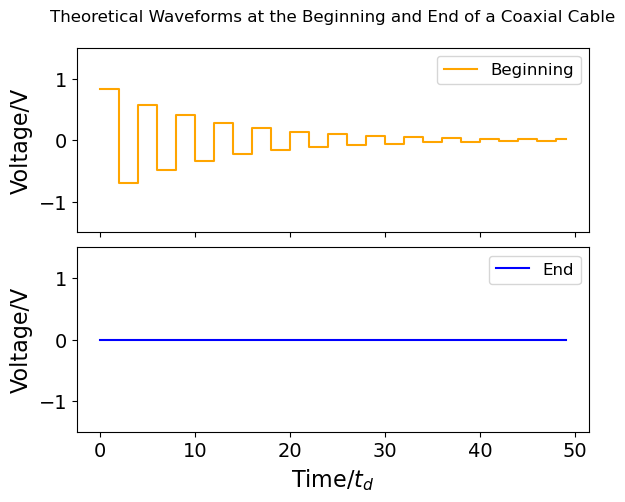

In [113]:
#序号7
Z0=50.4
Zs=50
v_sourse=10.

#串联等效
Zspc=510.
#并联等效
Zspb=1e100
v_sourser=Zspb*v_sourse/(Zspb+Zs+Zspc)
Zsr=(Zs+Zspc)*Zspb/(Zs+Zspc+Zspb)
print(f'等效信号源电压是{v_sourser}，等效信号源内阻是{Zsr}')

# 输出端等效
Z1=0

mydraw(Z0,Zsr,Z1,Nmax=50,u_sour=v_sourser,yrange=(-1.5,1.5),save='实验2/pic/xh7the.png')